<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Classes_Desbalanceadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classes Desbalanceadas
---



[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



Em uma base de dados, ter classes desbalanceadas tem um **impacto negativo** quando se trata de um modelo de Machine Learning.


![Balança](https://image.freepik.com/vetores-gratis/escalas-design-plano-ilustracao-vetorial_74669-85.jpg)


Seja em um problema de **regressão** ou um problema de **classificação**, classes desbalanceadas fazem com que o modelo aprenda melhor sobre a classe majoritária, um problema muito comum chamado de **enviesamento**.

**Quando posso considerar que as classes estão desbalanceadas?**
* Normalmente com **70% (classe majoritária) e 30% (classe minoritária)** já pode ser considerada, veja que não estou falando de 30% em relação à majoritária, apenas em relação ao total.
* No caso tratado aqui, a classe minoritária tem aproximadamente 13.15% se comparada apenas à classe majoritária. Se levado em consideração o total da feature esse valor cai para 8.54%

**O que fazer**

**Adquirir mais dados** da menor classe é a melhor solução e mais óbvia, contudo nem sempre é possível, principalmente por dois motivos, que com um olhar macro acabam sendo a mesma coisa: 
* impossibilidade natural na captação de dados, por haver indisponibilidade de acesso ou algo dessa natureza;
* Quando é comum ao negócio.
    * Nesse caso em específico devemos falar um pouco mais.
        * Em um sistema de detecção de fraudes, em média, 90% das transações não são fraudulentas, ao passo que os outros 10% o são, então como captar mais transações com fraude para trazer maior robustez à base de dados?
        * Em um modelo onde se busca características de alunos que vão sair ou evadir de uma instituição, como trazer mais dados de alunos que saem da escola, se não é tão frequente a saida quanto a permanência dos alunos?!
        
Bom, em ambos os problemas, não há possibilidade de reter mais dados para que o problema seja sanado. Como resolver? Veremos as **três técnicas** mais utilizadas e bastante difundidas para a solução desses problemas.

* **1. Undersampling:**
    * Consiste em **reduzir** de forma aleatória os exemplos da classe majoritária.
    * A **desvantagem** desse método é que pode tornar a base de dados fraca, uma vez que ao reduzi-la, pode-se deixar de fora padrões importantes.
    * A **vantagem** é, através do método *NearMiss*, fazer a redução tentando manter a separabilidade dos dados, procurando exemplos que não sejam tão diferentes da classe minoritária.
    
* **2. Oversampling:**
    * **Aumenta** os exemplos da classe minoritária.
    * Utilizando o *SMOTE*, dados sintéticos serão gerados a partir da classe minoritária, a partir dos seus vizinhos.

* **3. Engenharia de Features:**
    * Gera novas features (caracteristicas) para os dados, fazendo com que os dados tenham mais robustez e, automaticamente ficando menos suscetível ao enviesamento.
    * Sua principal **desvantagem** é o tempo demorado para sua realização, o que pode atrasar um projeto.
    
 > Uma observação importante é que, pela generalidade das primeiras técnicas, elas serão as abordadas aqui, uma vez que a *Engenharia de Features* dependerá de como será feita para casa em particular.
 
## Checklist

1. Definição do Problema
2. Reconhecimento do Problema e Tratamento dos Dados
3. Aplicação do NearMiss (Undersampling)
4. Aplicação do SMOTE (Oversampling)


# 1. Definição do Problema
Trataremos de uma base de dados bancária onde, nesse caso, a classe minoritária tem aproximadamente 13% do tamanho da majoritária, ou seja, claramente desbalanceada.

### Objetivo
Utilizar o **NearMiss** e o **SMOTE** para tornar as classes balanceadas e, ao final da aplicação de cada técnica, fazer a avaliação do modelo com a técnica aplicada.

Será aplicada a **Regressão Logistica** para ambos os caos. 
* Regressão Logistica é um modelo simples de Regressão Linear do tipo logistico, que nos retorna respostas binárias (0 e 1) denominados "fracasso" e "sucesso". Em nosso caso será utilizada para *fraude* e *não fraude*.

### Métricas de  Desempenho

Serão utilizadas cinco métricas, a primeira vinda da biblioteca Pandas e as outras métricas da sklearn.metrics:

1. **Cross table:**
    * Melhor traduzido como *Matriz de Consufão*, traz de uma forma simples o desempenho do classificador, trazendo o quanto o este acertou ou errou por cada classe.
    
2. **Precision:**
    * Precisão é a razão (divisão) entre as observações positivas previstas corretamente e o total de observações positivas previstas.
  $$
  precisao=\frac{TP}{TP+FP}
  $$
    
3. **Recall:**
    * Também chamada de *Revocação* ou *Sensibilidade*, nos fornece o número de vezes que uma classe foi predita de forma correta, dividida pelo número de classes que contém nos dados.
  $$
  recall=\frac{TP}{TP+FN}
  $$

4. **F1-score:** 
    * Ou *Medida F1*, utiliza a média harmônica entre a precisão e a revocação.
  $$
  F1=2*\frac{precisao*recall}{precisao+recall}
  $$
    * Sendo uma combinação de duas outras métricas, em tese é mais robusta, dando uma informação mais precisa e importante.
    
5. **Accuracy:**
    * A *acurácia* é uma métrica que permite uma visualização geral do classificador.
    * Sua saida é o percentual de classificações corretas pelo classificador.
    * Com classes desbalanceadas não se sai muito bem uma vez que acaba "mascarando" o problema.
    * Accuracy= Número de Predições Corretas/Número total de Predições ou

    
  $$
  accuracy=\frac{TP+TN}{TP+TN+FP+FN}
  $$

**Legenda**
* TP = True Positive (Verdadeiro Positivo)
* TN = True Negativa (Verdadeiro Negativo)
* FP = False Positive (Falso Positivo)
* FN = False Negative (Falso Negativo)
    
**Support:**
* O suporte é o número puro ou real de dados para a classe. Não é uma métrica propriamente dita, mas ajuda por estar junto às outras métricas como o próprio nome diz, dando suporte. 
* Com ele é possível, por exemplo ver se as classes estão desbalançeadas ou não, caso tenha fugido da análise, aqui é uma chance de ser ver isso.

**Importações das bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression # Regressão Logistica / Algoritmo classificador muito simples
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
# a biblioteca que contém o smote e o nearmiss (é uma extensão da SKlearn) é a 'imblearn'
import seaborn as sns

**Carregando Base de dados do Banco**

In [ ]:
df = pd.read_csv('/home/amador/dados/bank-full.csv', sep=';')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


# 2. Reconhecimento do Problema e Tratamento dos Dados

**Informações a respeito dos dados**

Mas especificamente os tipos de cada coluna.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Transformação dos dados
Apenas para permitir uma melhor usabilidade dos dados.

**Formatando algumas colunas para melhorar a visualização**

In [ ]:
# em especial a coluna alvo que deixará de ser 0 e 1 para ser 'no' e 'yes'
df["default"] = df["default"].map({"no":0,"yes":1})
df["housing"] = df["housing"].map({"no":0,"yes":1})
df["loan"] = df["loan"].map({"no":0,"yes":1})
df["y"] = df["y"].map({"no":0,"yes":1})
df.education = df.education.map({"primary": 0, "secondary":1, "tertiary":2})
df.poutcome = df.poutcome.map({"unknown": 0, "failure":1, "other":2, "success":3})
df.contact = df.contact.map({"cellular": 0, "unknown":1, "telephone":2})
df.month = pd.to_datetime(df.month, format = "%b").dt.month

### Visualização se está desbalanceada
* 'no' = Não Fraude
* 'yes' = Fraude

Veja que com um total de apenas **13.25%** (39922/5289) da classe majoritária (no), a minoritária (yes) trará dificuldade para o modelo aprender.

**Visualização das classes** 

In [ ]:
df.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

### Visualização e tratamento de valores faltantes

**Checando valores faltantes**

In [ ]:
df.isnull().sum()

age             0
job             0
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

**Removendo missing values**

In [ ]:
df.dropna(inplace = True)
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,2.0,0,2143,1,0,1,5,5,261,1,-1,0,0,0
1,44,technician,single,1.0,0,29,1,0,1,5,5,151,1,-1,0,0,0
2,33,entrepreneur,married,1.0,0,2,1,1,1,5,5,76,1,-1,0,0,0


### Transformando colunas categóricas em numéricas
Em alguns modelos, somente são aceitos valores numéricas, mas não valores categóricos (palavras, letras e frases).

Para isso, utilizaremos o métodos **get_dummies** do pandas para isso. O método permite fazer a transformação de forma rápida e intuitiva.

Esse métodos cria o que é chamado de **Matriz de Presença**, a saber, a variável job que tem várias classes (retired, self-employed etc), será transformada em uma matriz onde, por exemplo, se a pessoa daquele linha tem o *job* do tipo *retired*, na coluna job_retired ele receberá o valor 1 (um) e nas demais 0, pois não trabalha nas demais profissões. Já alguém que não está na categoria *retired* recebe o valor 0 (zero) nesta e nas demais, com exceção da coluna que reprenta o seu atual trabalho, onde receberá 1 (um).


**Transformando dados**

In [ ]:
df = pd.get_dummies(df)
df.head(3)

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2.0,0,2143,1,0,1,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1.0,0,29,1,0,1,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1.0,0,2,1,1,1,5,5,76,...,0,0,0,0,0,0,0,0,1,0


### Distribuição das classes

In [ ]:
# distribuição das classes
df.y.value_counts()

0    38317
1     5037
Name: y, dtype: int64

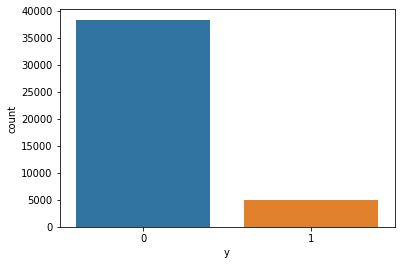

In [ ]:
import seaborn as sns
ax = sns.countplot(x="y", data=df)

### Classificação

**Instanciando um classificador**

In [ ]:
lr = LogisticRegression()

**Separando features e classes**

In [ ]:
X = df.drop("y", axis = 1)
y = df.y

**Separando dados de treino e teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

**Treinando o algoritmo**

In [ ]:
lr.fit(X_train, y_train)

/home/amador/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

**Predizendo resultados de teste**

In [ ]:
y_pred = lr.predict(X_test)

### Avaliação do Modelo

**Acurácia**

In [ ]:
accuracy_score(y_test, y_pred)

0.8931635759756436

**Relatório de classificação**

Observação no recall

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9580
           1       0.61      0.22      0.33      1259

    accuracy                           0.89     10839
   macro avg       0.76      0.60      0.63     10839
weighted avg       0.87      0.89      0.87     10839



**Matriz de confusão**

In [ ]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0    1    All
Real                      
0         9399  181   9580
1          977  282   1259
All      10376  463  10839


Como falado na introdução, a acurácia mascara um pouco as classes desbalanceadas. Veja que seu percentual é bom, 89%., contudo a ver as demais métricas a exemplo do recall, consequentemente do F1, mostra quase 100% de acerto da classe 0 (zero) e apenas uma média de 20% a 30% da classe 1 (um).

# 3. Aplicação do NearMiss (Undersampling)

**Instanciando o NearMiss**

In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()

**aplicando o nearmiss**

In [ ]:
X, y = nr.fit_sample(X, y)

**Checando a quantidade por classe**

In [ ]:
y.value_counts()

1    5037
0    5037
Name: y, dtype: int64

**Checando a quantidade graficamente**

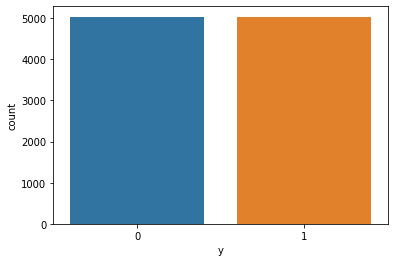

In [ ]:
ax = sns.countplot(x=y)

**Visualização dos tipos de cada coluna**

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10074 entries, 0 to 10073
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10074 non-null  int64  
 1   education          10074 non-null  float64
 2   default            10074 non-null  int64  
 3   balance            10074 non-null  int64  
 4   housing            10074 non-null  int64  
 5   loan               10074 non-null  int64  
 6   contact            10074 non-null  int64  
 7   day                10074 non-null  int64  
 8   month              10074 non-null  int64  
 9   duration           10074 non-null  int64  
 10  campaign           10074 non-null  int64  
 11  pdays              10074 non-null  int64  
 12  previous           10074 non-null  int64  
 13  poutcome           10074 non-null  int64  
 14  job_admin.         10074 non-null  uint8  
 15  job_blue-collar    10074 non-null  uint8  
 16  job_entrepreneur   100

**Dividindo os dados**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

**Instanciando o classificador e treinando o algoritmo**

In [ ]:
# instanciando o classificador
lr = LogisticRegression()
# treinando o algoritmo
lr.fit(X_train, y_train)

/home/amador/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

**Predizendo resultados de teste**

In [ ]:
y_pred = lr.predict(X_test)

**Checando a acurácia**

In [ ]:
accuracy_score(y_test, y_pred)

0.8717745136959111

**Métricas**

Atenção no recall

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1259
           1       0.89      0.85      0.87      1260

    accuracy                           0.87      2519
   macro avg       0.87      0.87      0.87      2519
weighted avg       0.87      0.87      0.87      2519



**Matriz de confusão**


In [ ]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0     1   All
Real                     
0        1128   131  1259
1         192  1068  1260
All      1320  1199  2519


Veja que, agora o modelo melhorou! Embora a acurácia tenha caido para 87%, as demais métricas nos mostram que já se aproximaram no acerto das classes 0 (zero) e 1 (um), numa proximidade de 85% a 90%.

# 4. Aplicação do SMOTE (Oversampling)
SMOTE (Synthetic Minority Over-sampling Technique)¶

**Separando os dados**

In [ ]:
X = df.drop("y", axis = 1)
y = df.y

**Visualizando os dados por classe**


In [ ]:
np.bincount(y)

array([38317,  5037])

**Visualizando graficamente**

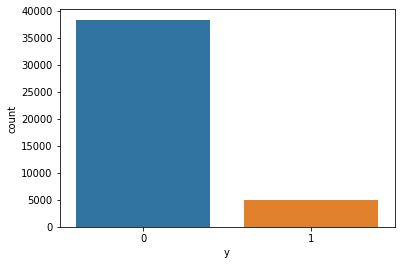

In [ ]:
ax = sns.countplot(x=y)

**Instanciando**

Com sampling_strategy=0.5. 0.5 aumenta em 50% da minoritária em relação à classe majoritária.

Sem esse parâmetro ele deixa igualitário.

In [ ]:
smt = SMOTE(sampling_strategy=0.5)

**Aplicando o SMOTE**

In [ ]:
X, y = smt.fit_sample(X, y)

**Nova distribuição**

In [ ]:
np.bincount(y)

array([38317, 19158])

**Visualizando graficamente**

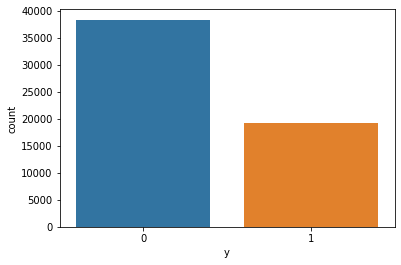

In [ ]:
ax = sns.countplot(x=y)

**Separando os dados**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

**Instanciando**

In [ ]:
# instanciando o classificador
lr = LogisticRegression()
# treinando o algoritmo
lr.fit(X_train, y_train)

/home/amador/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

**Predizendo com os valores de teste**

In [ ]:
y_pred = lr.predict(X_test)

**Checando a acurácia**


In [ ]:
accuracy_score(y_test, y_pred)

0.822047463289025

**Métricas**

Atenção no recall

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      9579
           1       0.78      0.66      0.71      4790

    accuracy                           0.82     14369
   macro avg       0.81      0.78      0.79     14369
weighted avg       0.82      0.82      0.82     14369



**Matriz de confusão**

In [ ]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0     1    All
Real                       
0         8672   907   9579
1         1650  3140   4790
All      10322  4047  14369


### Considerações Finais
* Em relação ao *undersampling*, o *oversampling* se saiu pior. Isso é perceptível a partir da discrepância entre a acertabilidade em relação às classes, mas também pela acurácia que fico em 82% aproximadamente.

* É **importante** deixar claro que nem sempre o undersampling funcionará melhor que o oversampling, as métricas servem exatamente pra que isso possa ser avaliado e, é **dever do cientista de dados** fazer essa avaliação.

* É importante também fazer teste com *Engenharia de Features* para que se cubra mais possibilidade.

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)


<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>